## Trabalho 1 - MNED

In [1]:
# BIBLIOTECAS
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
# PRINTS
def print_matrix(matrix):  # Funcao auxiliar para printar uma matriz de forma organizada
    # Pega a largura máxima precisa para qualquer elemento
    max_width = max(len(str(element)) for row in matrix for element in row)
    
    for line in matrix:
        # Formata cada elemento para que tenha largura consistente
        formatted_row = [str(element).rjust(max_width) for element in line]
        print(" ".join(formatted_row))

def print_Smatrix(matrix):
    """
    Prints a matrix of strings in a readable format.
    
    Args:
        matrix: A list of lists where each inner list represents a row of strings
    """
    if not matrix:
        print("Empty matrix")
        return
    
    # Calculate the maximum width needed for each element
    max_width = 0
    for row in matrix:
        for item in row:
            if isinstance(item, list):
                for element in item:
                    max_width = max(max_width, len(str(element)))
            else:
                max_width = max(max_width, len(str(item)))
    
    # Print each row with proper formatting
    for row in matrix:
        if isinstance(row, list) and row and isinstance(row[0], list):
            # Handle case where row is a list of lists
            for subrow in row:
                formatted_row = [str(item).center(max_width + 2) for item in subrow]
                print("".join(formatted_row))
        else:
            # Handle case where row is a simple list
            formatted_row = [str(item).center(max_width + 2) for item in row]
            print("".join(formatted_row))
    
    print()  # Add an empty line after printing the matrix

### Discretizacao do Problema

In [3]:
# DISCRETIZACAO DO PROBLEMA
# Escolha do tamanho de passo
h = 0.125

# Discretizacao do domínio
X = np.arange(0, 1, h)
Y = np.arange(-1, 1, h)

# Numero total de pontos
nx = len(X)
ny = len(Y)

# Numero total de pontos interiores
nx_int = len(X) - 2
ny_int = len(Y) - 2

print(ny_int)

14


### Solucao Exata

In [4]:
# Constante C
c = 4*np.pi**2 -3

# Solucao Exata do Problema
def u(x,y):
    return np.exp(-y)*np.sin(2*np.pi*x)

Text(0.5, 0, 'u(x,y)')

<Figure size 640x480 with 0 Axes>

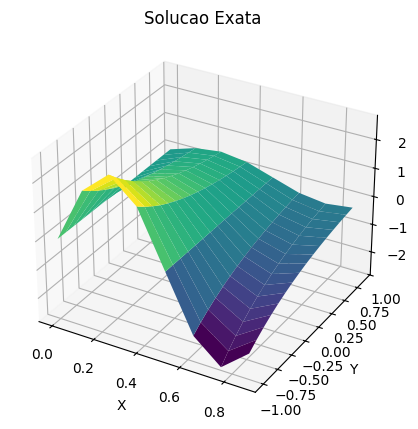

In [5]:
# Plotando a solucao exata
X, Y = np.meshgrid(X, Y)

exata = u(X,Y)

# Plotando Solucao Exata e Solucao Numerica
fig = plt.figure()
fig = plt.figure(figsize=(12, 5))
# Primeiro subplot para solucao exata
ax1 = fig.add_subplot(121, projection='3d')
ax1.plot_surface(X, Y, exata, cmap='viridis')
ax1.set_title('Solucao Exata')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('u(x,y)')

### Construindo Matriz dos Coeficientes

#### 1/4. Apenas Pontos Interiores

In [9]:
print(f"nx_int: {nx_int}")
print(f"ny_int: {ny_int}")

T = np.zeros((nx_int, nx_int))
T += np.diag([-8/h**2] * nx_int, 0)  + np.diag([1/h**2] * (nx_int-1), 1)  + np.diag([1/h**2] * (nx_int-1), -1)  

#I = np.eye(nx_int)
zero_block = np.zeros((nx_int, nx_int))

I_lower = (3/h**2-c/(2*h))*np.eye(nx_int)
I_upper = (3/h**2+c/(2*h))*np.eye(nx_int)

block_first = np.concatenate((T, I_upper), axis=1)
block_middle = np.concatenate((I_lower, block_first), axis=1)
block_last = np.concatenate((T, I_lower), axis=1)

print(f"tamanho da matriz bloco primeiro: {block_first.shape}")
print(f"tamanho da matriz bloco meio: {block_middle.shape}")
print(f"tamanho da matriz bloco ultimo: {block_last.shape}")
print(f"tamanho da matriz bloco zero: {zero_block.shape}")

def concat_n_times(block, n):
    #print(f"tamanho da matriz bloco: {block.shape}")
    temp = block
    for i in range(n):
        temp = np.concatenate((temp, block), axis=1)
    #print(f"tamanho da matriz bloco concatenado: {temp.shape}")
    return temp

row_first = np.concatenate((block_first,concat_n_times(zero_block, ny_int-3)), axis=1)
row_last = np.concatenate((concat_n_times(zero_block, ny_int-3), block_last), axis=1)


def create_row(n_before, n_after, block, zero_block):
    if n_before != 0:
        temp = np.concatenate((concat_n_times(zero_block, n_before-1), block), axis=1)
    else:
        temp = block
    if n_after != 0:
        temp = np.concatenate((temp, concat_n_times(zero_block, n_after-1)), axis=1)
    return temp

vis = []

for i in range(0,ny_int):

    if i == 0:
        print(f"i: {i}")
        A = row_first
        vis.append([["T", "Iu"] + (ny_int-2)*["0"]])

    if i != 0 and i != ny_int-1:
        print(f"i: {i}")
        antes = i-1
        depois = ny_int-antes-3
        """
        print(f"antes: {antes}")
        print(f"depois: {depois}")
        print(f"ny_int: {ny_int}")
        """
        vis.append([(antes)*["0"] + ["Il", "T", "Iu"] + (depois)*["0"]])


        temp = create_row(antes, depois, block_middle, zero_block)
        A = np.concatenate((A, temp), axis=0)

    if i == ny_int-1:
        print(f"i: {i}")
        A = np.concatenate((A, row_last), axis=0)
        vis.append([(ny_int-2)*["0"] + ["Il", "T"]])
        print_Smatrix(vis)

print(A.shape)

nx_int: 6
ny_int: 14
tamanho da matriz bloco primeiro: (6, 12)
tamanho da matriz bloco meio: (6, 18)
tamanho da matriz bloco ultimo: (6, 12)
tamanho da matriz bloco zero: (6, 6)
i: 0
i: 1
i: 2
i: 3
i: 4
i: 5
i: 6
i: 7
i: 8
i: 9
i: 10
i: 11
i: 12
i: 13
 T   Iu  0   0   0   0   0   0   0   0   0   0   0   0  
 Il  T   Iu  0   0   0   0   0   0   0   0   0   0   0  
 0   Il  T   Iu  0   0   0   0   0   0   0   0   0   0  
 0   0   Il  T   Iu  0   0   0   0   0   0   0   0   0  
 0   0   0   Il  T   Iu  0   0   0   0   0   0   0   0  
 0   0   0   0   Il  T   Iu  0   0   0   0   0   0   0  
 0   0   0   0   0   Il  T   Iu  0   0   0   0   0   0  
 0   0   0   0   0   0   Il  T   Iu  0   0   0   0   0  
 0   0   0   0   0   0   0   Il  T   Iu  0   0   0   0  
 0   0   0   0   0   0   0   0   Il  T   Iu  0   0   0  
 0   0   0   0   0   0   0   0   0   Il  T   Iu  0   0  
 0   0   0   0   0   0   0   0   0   0   Il  T   Iu  0  
 0   0   0   0   0   0   0   0   0   0   0   Il  T   Iu 
 0   0 

#### Digressao (conferindo validade da discretizacao interior)

#### 2/4. Apenas Bordo de Robin

In [11]:
R = np.zeros((nx_int, nx_int))
R += np.diag([-8] * nx_int, 0)  + np.diag([1] * (nx_int-1), 1)  + np.diag([1] * (nx_int-1), -1)  


#### 3/4. Apenas Bordo de Neumann

#### 4/4. Juntando os 3 Sistemas Lineares em 1